In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [39]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [40]:
dataset.describe()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [41]:
dataset.shape

(398, 8)

In [42]:
dataset.head()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [43]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [44]:
dataset = dataset.dropna()

In [45]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [46]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

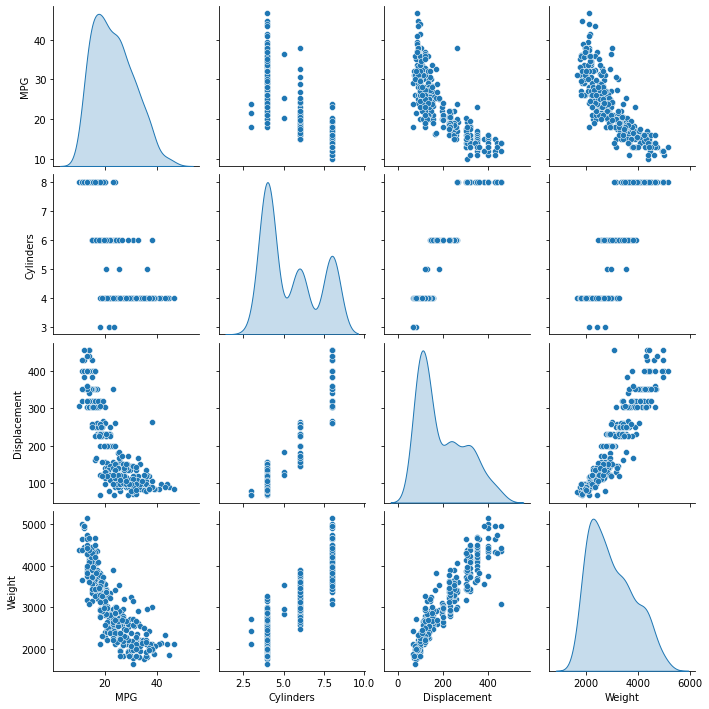

In [47]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [48]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [49]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

print(type(train_labels))

<class 'pandas.core.series.Series'>


In [50]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


In [51]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [52]:
normalizer.adapt(np.array(train_features))

In [53]:
print(normalizer.mean.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


In [54]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


In [55]:
horsepower = np.array(train_features['Horsepower'])

horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

In [56]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [57]:
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [58]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    # Enable Loggin!.
    verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 1s 28ms/step - loss: 22.8707 - val_loss: 22.9330
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 22.0624 - val_loss: 22.1332
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 21.2640 - val_loss: 21.3332
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 20.4636 - val_loss: 20.5332
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 19.6619 - val_loss: 19.7331
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 18.8624 - val_loss: 18.9331
Epoch 7/100
8/8 [==============================] - 0s 12ms/step - loss: 18.0647 - val_loss: 18.1334
Epoch 8/100
8/8 [==============================] - 0s 11ms/step - loss: 17.2652 - val_loss: 17.3332
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 16.4619 - val_loss: 16.5331
Epoch 10/100
8/8 [==============================] - 0s 5ms/step - loss: 15.6626 - val_loss: 15.7332
Epoch 

In [59]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.817326,4.150077,95
96,3.806500,4.149367,96
97,3.805874,4.168659,97
98,3.803319,4.179043,98
99,3.804697,4.219584,99


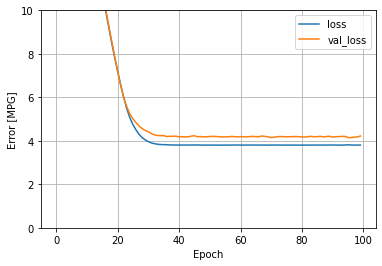

In [60]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [61]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=1)

3/3 [==============================] - 0s 3ms/step - loss: 3.6469


In [62]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

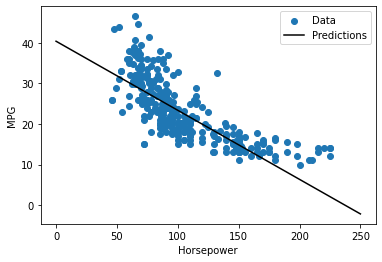

In [63]:
plot_horsepower(x, y)

In [64]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [65]:
linear_model.predict(train_features[:10])

array([[ 1.829],
       [ 0.051],
       [-0.367],
       [ 0.672],
       [-1.163],
       [ 0.011],
       [-1.072],
       [-1.128],
       [ 0.631],
       [-0.538]], dtype=float32)

In [66]:
linear_model.layers[1].kernel

<tf.Variable 'dense_3/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[-0.383],
       [ 0.519],
       [-0.724],
       [-0.532],
       [-0.399],
       [-0.657],
       [-0.166],
       [-0.583],
       [ 0.06 ]], dtype=float32)>

In [67]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')


Epoch 1/100
8/8 [==============================] - 0s 22ms/step - loss: 22.8992 - val_loss: 22.9542
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 22.0572 - val_loss: 22.2627
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 21.2659 - val_loss: 21.5374
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 20.4359 - val_loss: 20.8515
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 19.5877 - val_loss: 20.1280
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 18.7665 - val_loss: 19.4307
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 17.9388 - val_loss: 18.7183
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 17.1321 - val_loss: 18.0005
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 16.3060 - val_loss: 17.3297
Epoch 10/100
8/8 [==============================] - 0s 7ms/step - loss: 15.4882 - val_loss: 16.6327
Epoch 11

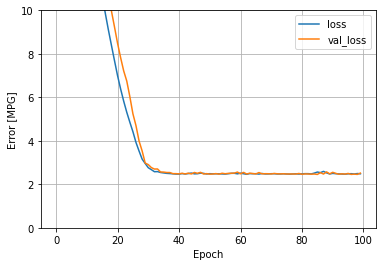

In [68]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Show that log!
    verbose=1,
    # Validation results on 20% of the training data.
    validation_split = 0.2)

plot_loss(history)

In [69]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=1)

3/3 [==============================] - 0s 2ms/step - loss: 2.5472


In [70]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.646940
linear_model,2.547222


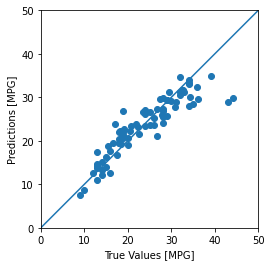

In [71]:
test_predictions = linear_model.predict(test_features).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

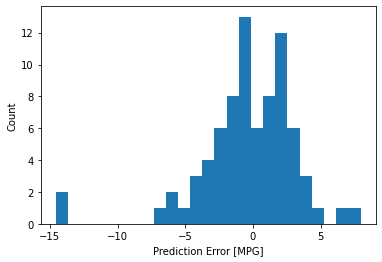

In [72]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [73]:
linear_model.save('linear_model')

reloaded = tf.keras.models.load_model('linear_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

INFO:tensorflow:Assets written to: linear_model\assets


,Mean absolute error [MPG]
horsepower_model,3.646940
linear_model,2.547222
reloaded,2.547222
